<a href="https://colab.research.google.com/github/fawziafaraag/machine_learning-I-/blob/main/house_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import libraries**
====================

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
sns.set(font_scale=1)

**Load train & test data**
====================

In [4]:
houses_train=pd.read_csv("train.csv")
houses_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
houses_test = pd.read_csv("test.csv")
houses_test.head()
#note their is no "SalePrice" column here which is our target varible.
sample_submission=pd.read_csv("sample_submission.csv")

In [6]:
#shape command will give number of rows/samples/examples and number of columns/features/predictors in dataset
#(rows,columns)
houses_train.shape

(1460, 81)

There are total **1460 samples** which we can use to train model and **80 features** and **1 target variable.**

In [7]:
houses_test.shape
#1 column less because target variable isn't there in test set!

(1459, 80)

In [8]:
houses_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

#analysing 'SalePrice'


In [9]:
houses_train['SalePrice'].describe()


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


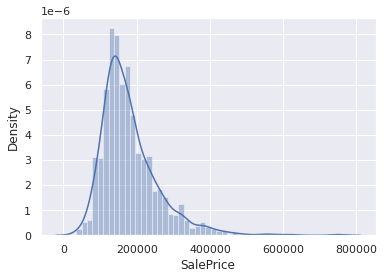

In [10]:
sns.distplot(houses_train['SalePrice']);

In [11]:
#skewness and kurtosis
print("Skewness: %f" % houses_train['SalePrice'].skew())
print("Kurtosis: %f" % houses_train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


In [12]:
#info method provides information about dataset like 
#total values in each column, null/not null, datatype, memory occupied etc
houses_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [13]:
##Describe gives statistical information about numerical columns in the dataset
houses_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [14]:
houses_train.duplicated().sum()

0

#Relationship with numerical variables


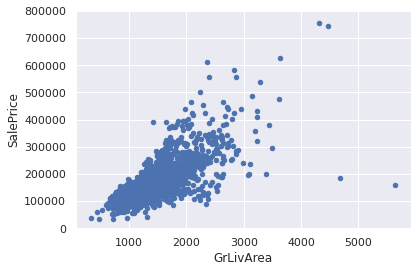

In [15]:
#scatter plot grlivarea/saleprice
var = 'GrLivArea'
data = pd.concat([houses_train['SalePrice'], houses_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

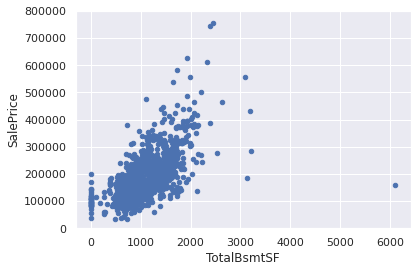

In [16]:
#scatter plot totalbsmtsf/saleprice
var = 'TotalBsmtSF'
data = pd.concat([houses_train['SalePrice'], houses_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

#Relationship with categorical features

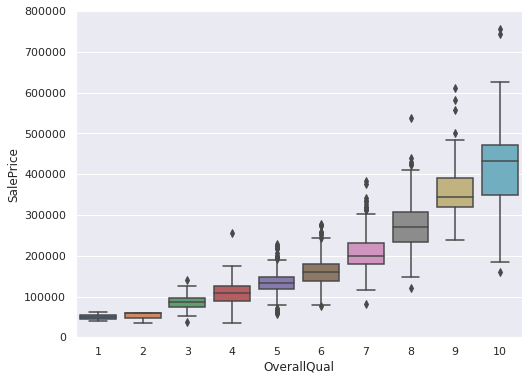

In [17]:
#box plot overallqual/saleprice
var = 'OverallQual'
data = pd.concat([houses_train['SalePrice'], houses_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);


In [18]:
#sns.pairplot(houses_train)

**Correlation in Data**
====================

In [19]:
corr=houses_train.corr()["SalePrice"]
corr[np.argsort(corr, axis=0)[::-1]]

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

OverallQual ,GrLivArea ,GarageCars,GarageArea ,TotalBsmtSF, 1stFlrSF     ,FullBath,TotRmsAbvGrd,YearBuilt, YearRemodAdd have more than 0.5 correlation with SalePrice. 

EnclosedPorch and KitchenAbvGr  have little negative correlation with target variable.

These can prove to be important features to predict SalePrice.


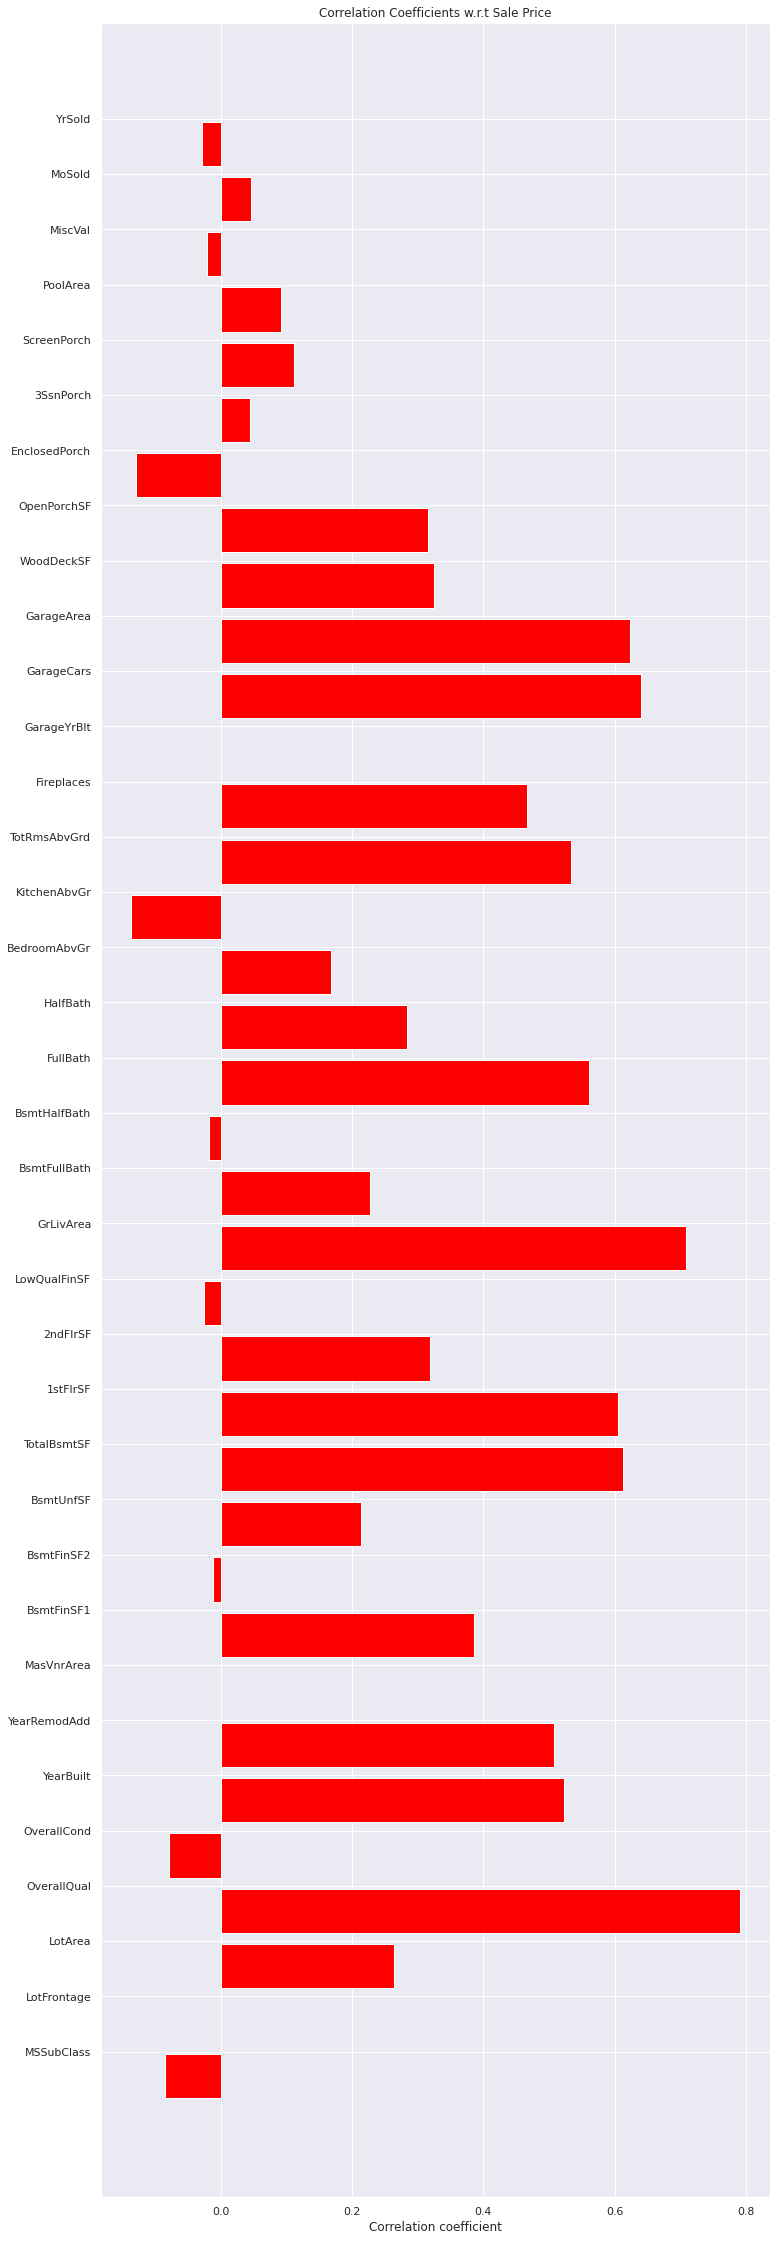

In [20]:
#plotting correlations
num_feat=houses_train.columns[houses_train.dtypes!=object]
num_feat=num_feat[1:-1] 
labels = []
values = []
for col in num_feat:
    labels.append(col)
    values.append(np.corrcoef(houses_train[col].values, houses_train.SalePrice.values)[0,1])
    
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(12,40))
rects = ax.barh(ind, np.array(values), color='red')
ax.set_yticks(ind+((width)/2.))
ax.set_yticklabels(labels, rotation='horizontal')
ax.set_xlabel("Correlation coefficient")
ax.set_title("Correlation Coefficients w.r.t Sale Price");

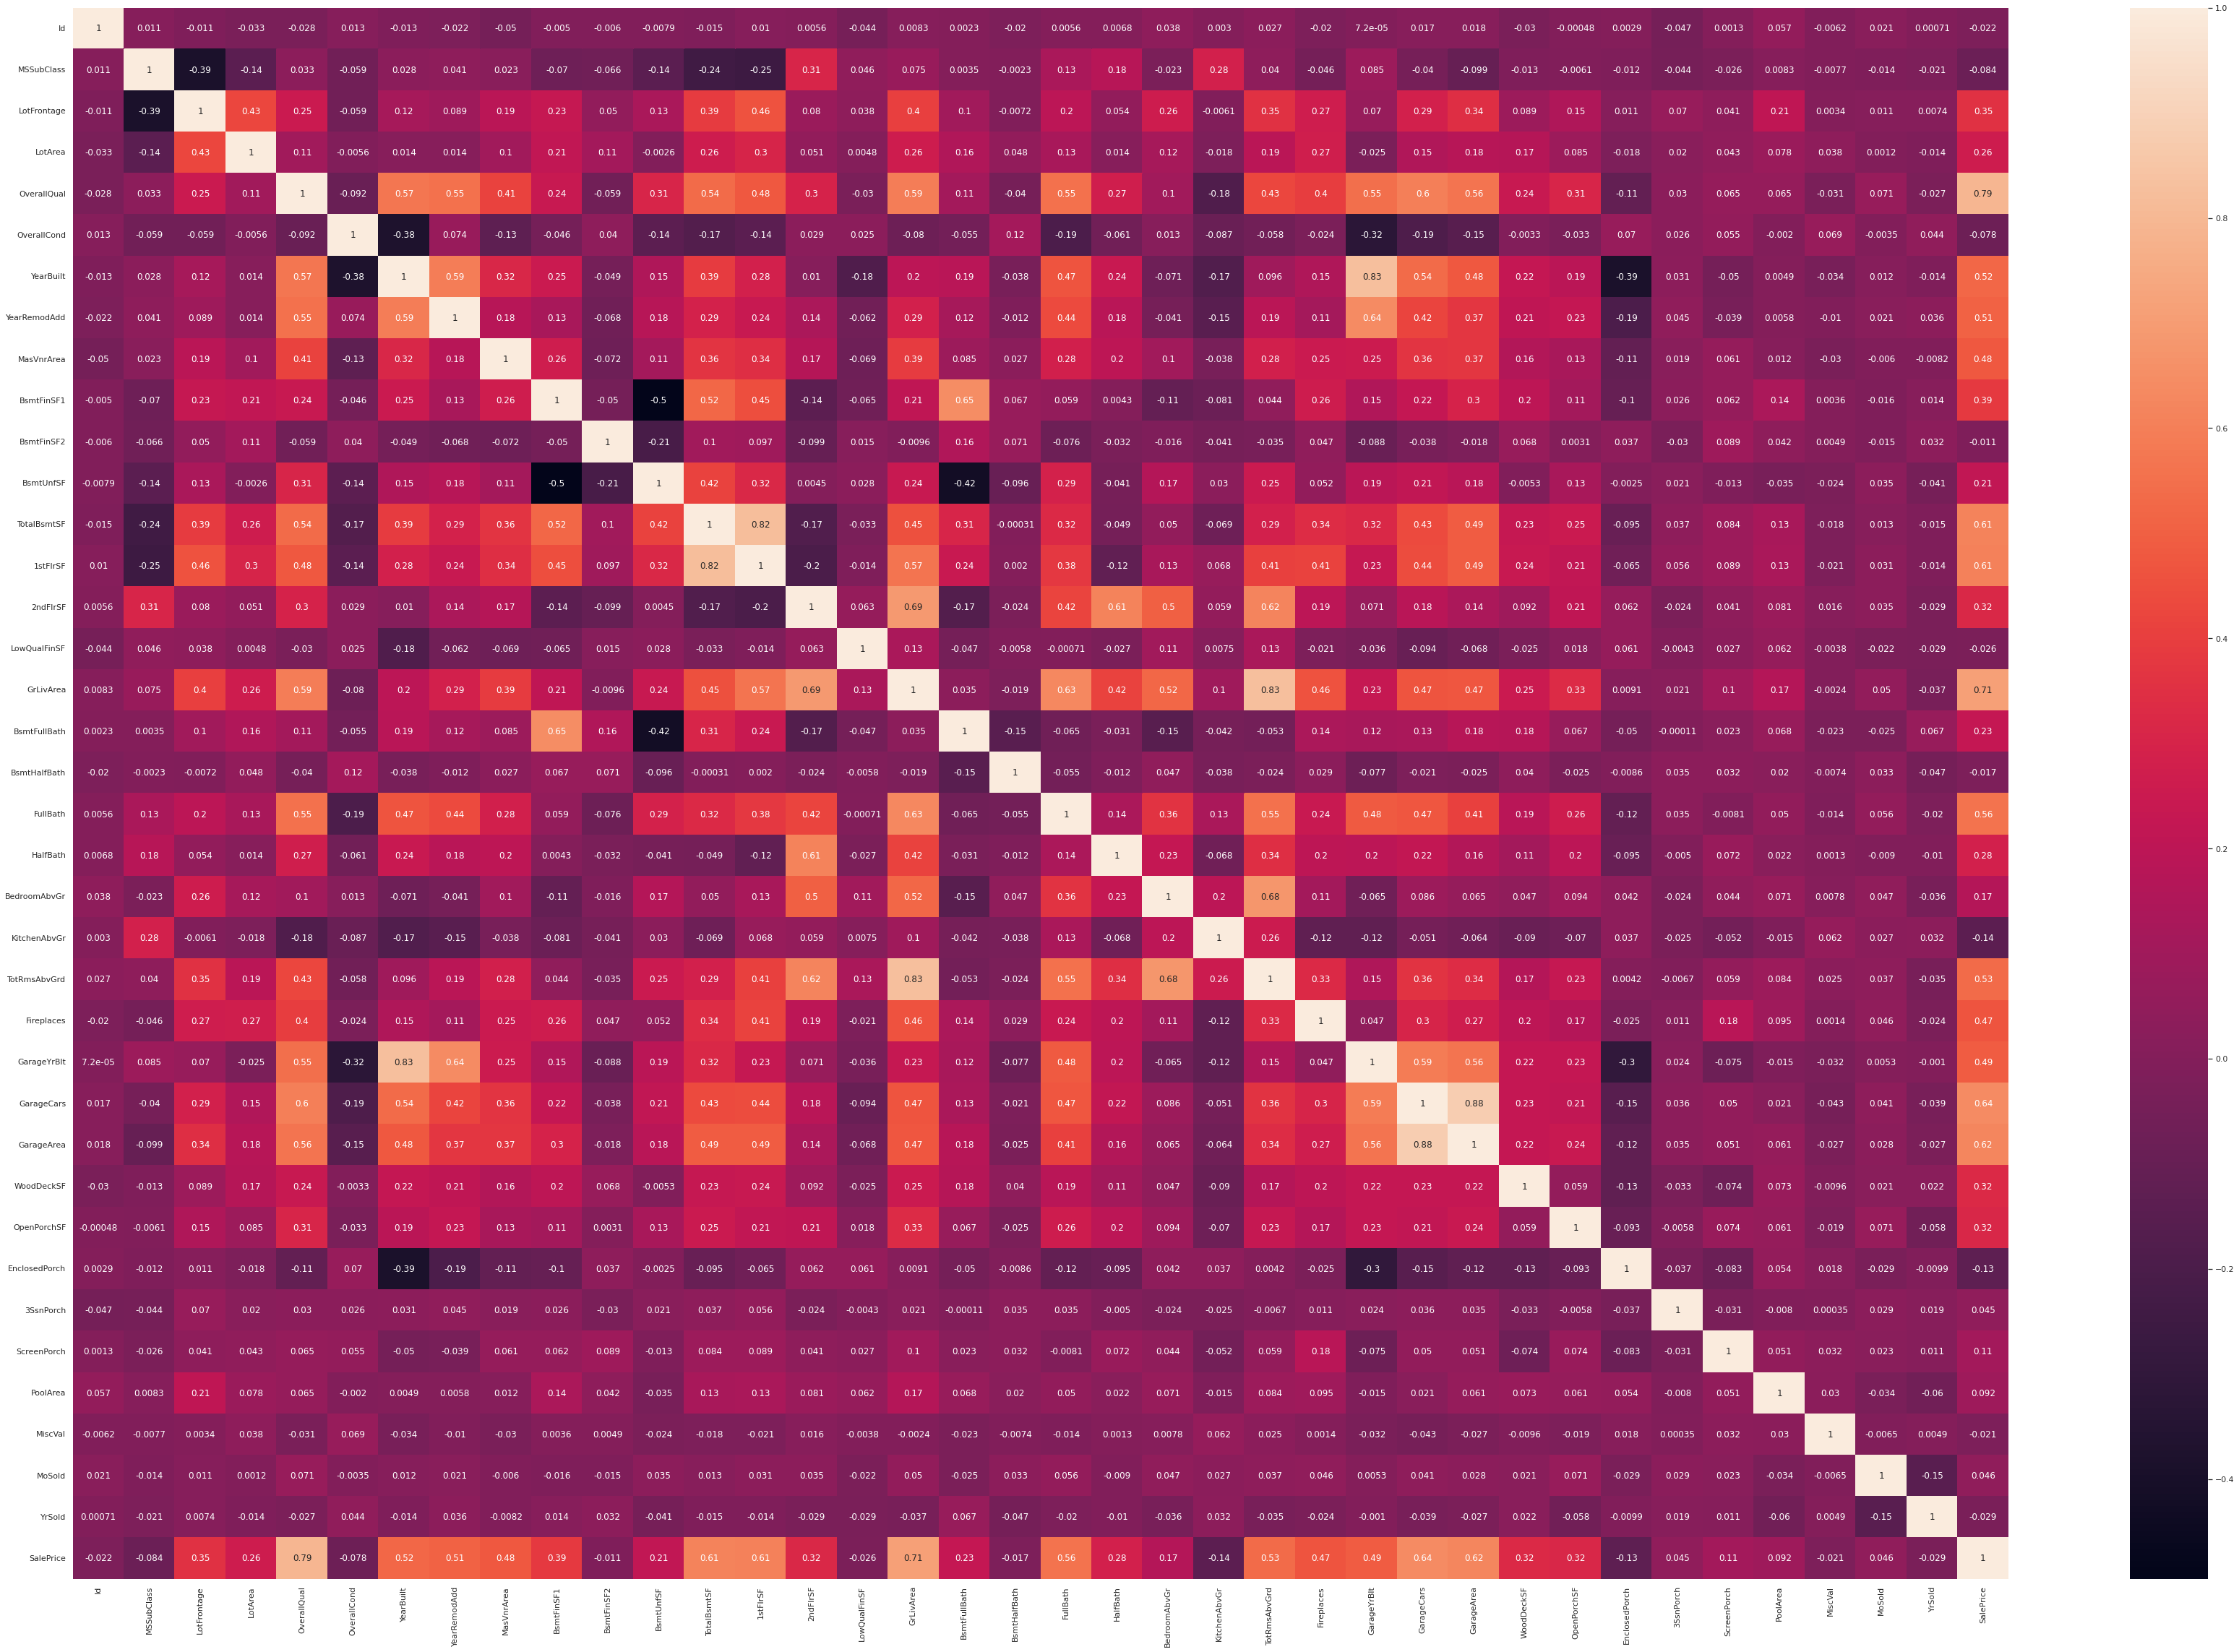

In [21]:
plt.figure(figsize=(60, 40))
corr = corr = houses_train.corr()
sns.heatmap(corr, annot= True)

In [22]:
cols = corr.nlargest(15, 'SalePrice')['SalePrice'].index
cols

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd', 'GarageYrBlt', 'MasVnrArea', 'Fireplaces',
       'BsmtFinSF1'],
      dtype='object')

In [23]:
houses_train = houses_train[cols]
houses_train.head()

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,GarageYrBlt,MasVnrArea,Fireplaces,BsmtFinSF1
0,208500,7,1710,2,548,856,856,2,8,2003,2003,2003.0,196.0,0,706
1,181500,6,1262,2,460,1262,1262,2,6,1976,1976,1976.0,0.0,1,978
2,223500,7,1786,2,608,920,920,2,6,2001,2002,2001.0,162.0,1,486
3,140000,7,1717,3,642,756,961,1,7,1915,1970,1998.0,0.0,1,216
4,250000,8,2198,3,836,1145,1145,2,9,2000,2000,2000.0,350.0,1,655


In [24]:
houses_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SalePrice     1460 non-null   int64  
 1   OverallQual   1460 non-null   int64  
 2   GrLivArea     1460 non-null   int64  
 3   GarageCars    1460 non-null   int64  
 4   GarageArea    1460 non-null   int64  
 5   TotalBsmtSF   1460 non-null   int64  
 6   1stFlrSF      1460 non-null   int64  
 7   FullBath      1460 non-null   int64  
 8   TotRmsAbvGrd  1460 non-null   int64  
 9   YearBuilt     1460 non-null   int64  
 10  YearRemodAdd  1460 non-null   int64  
 11  GarageYrBlt   1379 non-null   float64
 12  MasVnrArea    1452 non-null   float64
 13  Fireplaces    1460 non-null   int64  
 14  BsmtFinSF1    1460 non-null   int64  
dtypes: float64(2), int64(13)
memory usage: 171.2 KB


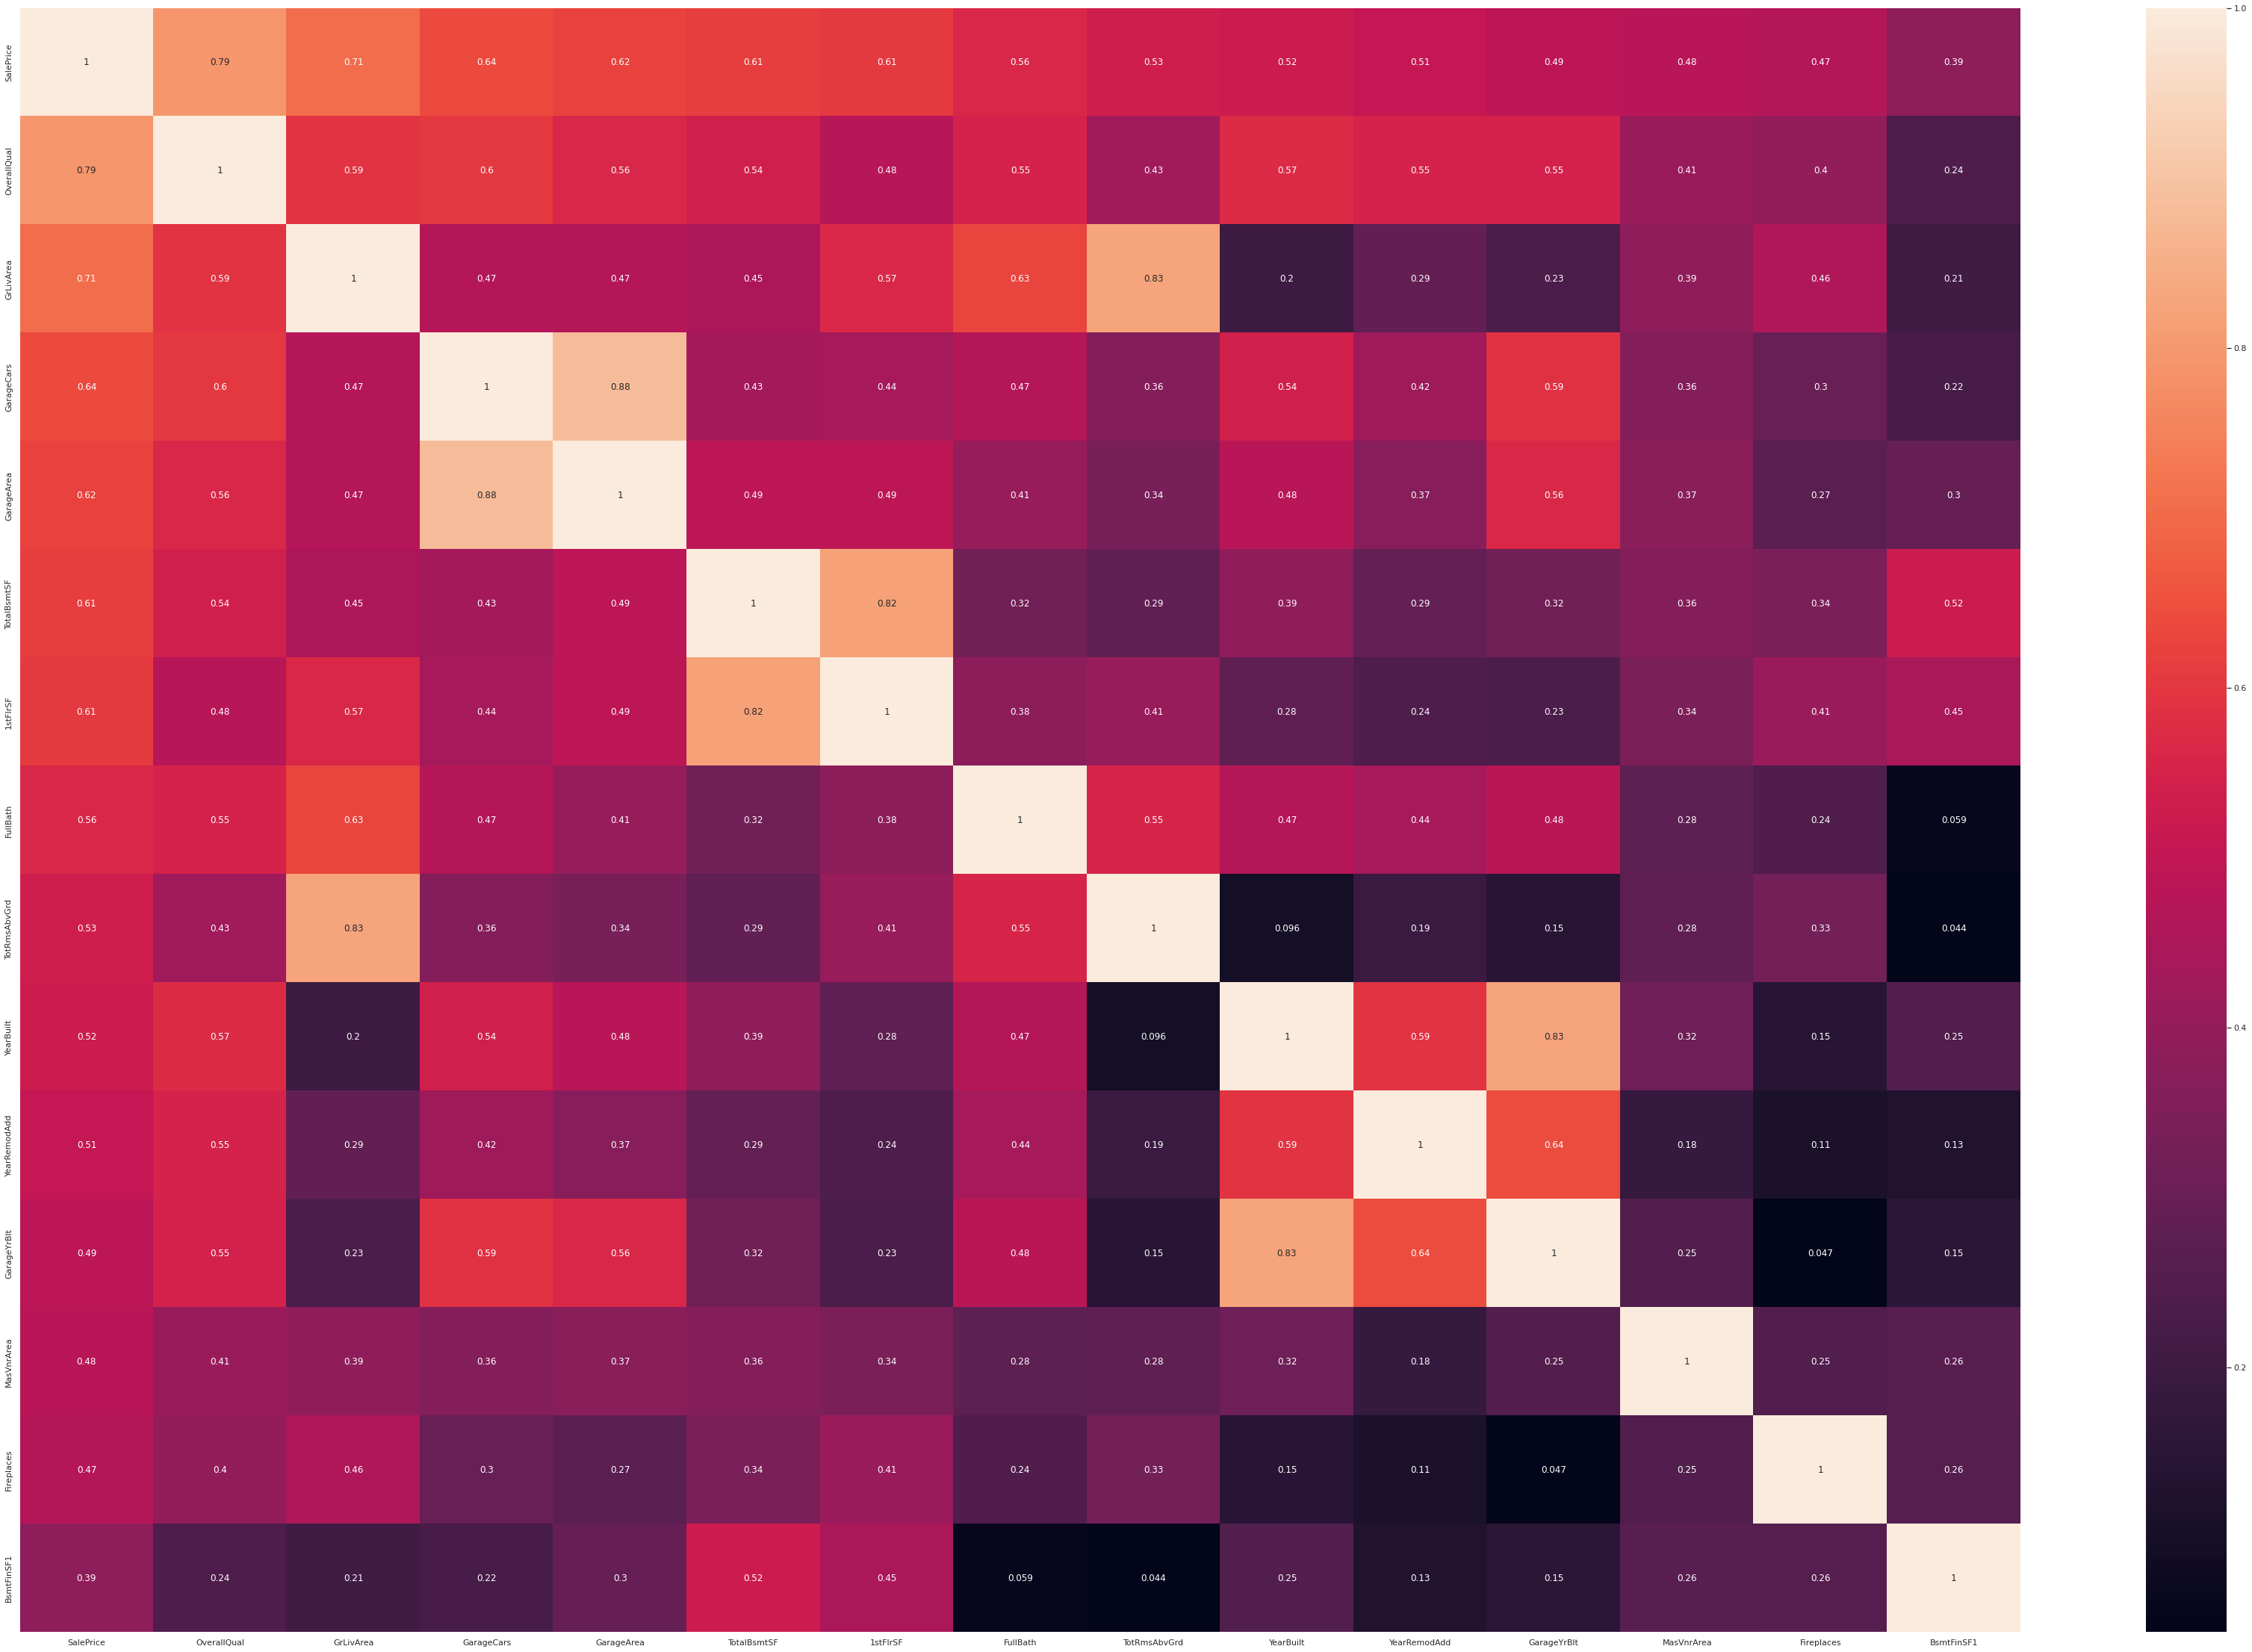

In [25]:
plt.figure(figsize=(60, 40))
corr = corr = houses_train.corr()
sns.heatmap(corr, annot= True)

In [26]:
houses_train.drop(columns= ['GarageArea', 'TotRmsAbvGrd', '1stFlrSF', 'GarageYrBlt'], inplace= True)
houses_test.drop(columns= ['GarageArea', 'TotRmsAbvGrd', '1stFlrSF', 'GarageYrBlt'], inplace= True)

In [27]:
categorical_cols = ['OverallQual', 'GarageCars', 'FullBath', 'Fireplaces']
houses_train[categorical_cols] = houses_train[categorical_cols].astype('category')
houses_test[categorical_cols] = houses_test[categorical_cols].astype('category')

In [28]:
columns = houses_train.select_dtypes(exclude= 'category').columns
m = len(columns)
m

7

In [29]:
houses_train['MasVnrArea'] = houses_train['MasVnrArea'].fillna(0)
houses_test['MasVnrArea'] = houses_test['MasVnrArea'].fillna(0)
#houses_test['OverallQual'] = houses_test['OverallQual'].fillna(0)
houses_test['GarageCars'] = houses_test['GarageCars'].fillna(0)
houses_test['FullBath'] = houses_test['FullBath'].fillna(0)
houses_test['Fireplaces'] = houses_test['Fireplaces'].fillna(0)

In [30]:
categorical_cols = [ 'GarageCars', 'FullBath', 'Fireplaces','MasVnrArea']
houses_train[categorical_cols] = houses_train[categorical_cols].astype('int64')
houses_test[categorical_cols] = houses_test[categorical_cols].astype('int64')

In [31]:
#sns.pairplot(houses_train)

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
scaler = StandardScaler()


In [33]:
y_train = houses_train['SalePrice']
X_train = houses_train.iloc[:, 1:]
#y_test = sample_submission['SalePrice']
#X_test = houses_test.iloc[:, 1:]

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_train,y_train)

In [36]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

#LinearRegression

In [37]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
print("train_score",reg.score(X_train, y_train),"test_score",reg.score(X_test, y_test))

train_score 0.7831568056689506 test_score 0.7965590410917684


#KNN

In [38]:
from sklearn.neighbors import KNeighborsRegressor

In [39]:
knn = KNeighborsRegressor(n_neighbors= 1)
knn.fit(X_train, y_train)
print("train_score",knn.score(X_train, y_train))
print("test_score",knn.score(X_test, y_test))

train_score 0.9999563560667358
test_score 0.7724241099242712


In [40]:
knn = KNeighborsRegressor(n_neighbors= 3)
knn.fit(X_train, y_train)
print("train_score",knn.score(X_train, y_train))
print("test_score",knn.score(X_test, y_test))

train_score 0.8821724812974658
test_score 0.7944284812625061


In [41]:
knn = KNeighborsRegressor(n_neighbors= 5)
knn.fit(X_train, y_train)
print("train_score",knn.score(X_train, y_train))
print("test_score",knn.score(X_test, y_test))

train_score 0.8604923602570678
test_score 0.7914393458808515
